In [115]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


In [116]:
# read file
df_original=pd.read_csv("Position_Salaries.csv")

df =df_original
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [117]:
df.shape

(10, 3)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [119]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [120]:
# checks for null values
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [121]:
# checks for duplicate values
df.duplicated().sum()

0

In [122]:
df = df[['Level','Salary']]

In [123]:
# splitting data into train & test dataset
train,test=train_test_split(df,test_size=0.3)

In [124]:
# saving datasets into csv filesS
test.to_csv('test_data.csv',index=False,encoding='utf-8')
train.to_csv('train_data.csv',index=False,encoding='utf-8')


In [125]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

,Level,Salary
0,6,150000
1,9,500000
2,3,60000
3,7,200000
4,8,300000


In [126]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.3)

In [127]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values


In [128]:
# saving cross validation data into csv file
cv_data.to_csv('cv_data.csv',index=False,encoding='utf-8')

In [129]:
regressor=RandomForestRegressor(n_estimators=40)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
y_pred = regressor.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,80000,110500.0
1,300000,350000.0
2,150000,143750.0
3,500000,430000.0


In [131]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,Level,Salary
0,7,200000
1,3,60000
2,5,110000


In [132]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

Accuracy of train data = 91.93171268386786
Accuracy of test data = 86.66846026490066


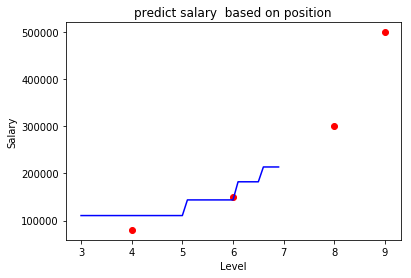

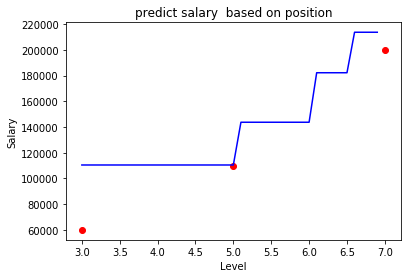

In [133]:
class RandomForest:
    
    def get_predictions_train(self,x):        
        # getting prediction values
        y_pred = regressor.predict(x)
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.explained_variance_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize(self,y_pred,x,y):
        # visualizing the training set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x,y,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict salary  based on position')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        
        
def main():
    # creates class object 
    obj = RandomForest()
    y_pred_train = obj.get_predictions_train(x_train)
    y_pred_test = obj.get_predictions_train(x_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    if acc_train >= 85 and acc_test >=  60:
        fileObject = open("train_data.pkl",'wb')
        pickle.dump(regressor,fileObject)   
        # here we close the fileObject
        fileObject.close()

    
    obj.visualize(y_pred_train,x_train,y_train)
    obj.visualize(y_pred_test,x_cv,y_cv)
    
    
    
if __name__ == '__main__':
    main()